# FAKE NEWS CLASSIFIER

## Using Stemming, TVIDFVectorizer, MultinomialNB Algortihm

## 1. Import Libraries

In [3]:
import pandas as pd #for creating datasets

import numpy as np

import re #regular expression for removing non-alphabetical character from dataset

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer #for creating models

from nltk.corpus import stopwords #set of meaningless words we'll remove from dataset

from nltk.stem import PorterStemmer #for stemming

from sklearn.model_selection import train_test_split #to split the training and testing data

import matplotlib.pyplot as plt #data visualization

from sklearn.naive_bayes import MultinomialNB #using classification model for prediction

from sklearn.linear_model import PassiveAggressiveClassifier #using another classification model for prediction

from sklearn import metrics #to calculate accuracy

import itertools

import pickle #to save the model

## 2. Import Train Data

In [4]:
df_train = pd.read_csv('news.csv') #reading the train data

In [5]:
df_train.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## 3. Data Analysis

In [6]:
message=df_train.copy()

In [7]:
message.head(10) #indexes are not in order

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [8]:
message.reset_index(inplace=True)

In [9]:
message.head(10) #indexes are in order

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [10]:
#drop the unnamed column

message.drop(message.columns[message.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [11]:
message.head(260)

,index,title,text,label
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
255,255,The role of the US and Nato in EU relations wi...,The role of the US and Nato in EU relations wi...,FAKE
256,256,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",REAL
257,257,"100,000 people have come to recent Bernie Sand...",The overflow crowds showing up to hear Bernie ...,REAL
258,258,Trump The President: What Does That Mean For T...,"in World — by Mirza Yawar Baig — November 10, ...",FAKE


In [12]:
message.shape

(6335, 4)

In [13]:
message = message.dropna() #remove null values

In [14]:
message.shape

(6335, 4)

In [15]:
message.head(260)

,index,title,text,label
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
255,255,The role of the US and Nato in EU relations wi...,The role of the US and Nato in EU relations wi...,FAKE
256,256,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",REAL
257,257,"100,000 people have come to recent Bernie Sand...",The overflow crowds showing up to hear Bernie ...,REAL
258,258,Trump The President: What Does That Mean For T...,"in World — by Mirza Yawar Baig — November 10, ...",FAKE


In [16]:
message.reset_index(inplace=True)

In [17]:
message.head(260)

,level_0,index,title,text,label
0,0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...,...
255,255,255,The role of the US and Nato in EU relations wi...,The role of the US and Nato in EU relations wi...,FAKE
256,256,256,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",REAL
257,257,257,"100,000 people have come to recent Bernie Sand...",The overflow crowds showing up to hear Bernie ...,REAL
258,258,258,Trump The President: What Does That Mean For T...,"in World — by Mirza Yawar Baig — November 10, ...",FAKE


In [18]:
message.drop(['index'], axis=1, inplace=True)

In [19]:
message.drop(['level_0'], axis=1,inplace=True)

In [20]:
message.head(260)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
255,The role of the US and Nato in EU relations wi...,The role of the US and Nato in EU relations wi...,FAKE
256,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",REAL
257,"100,000 people have come to recent Bernie Sand...",The overflow crowds showing up to hear Bernie ...,REAL
258,Trump The President: What Does That Mean For T...,"in World — by Mirza Yawar Baig — November 10, ...",FAKE


In [21]:
#now no keys are missing

## 4. Data cleaning and preprocessing

In [23]:
ps=PorterStemmer(); #stemming object creation

corpus=[];

for i in range(0,len(message)):
    #print(i)
    review=re.sub('[^a-zA-Z]',' ',message['text'][i])#substitute non-alphabetical characters with space
    review=review.lower()#lower the sentence
    review=review.split()#convert sentence into list of words
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]#stemming and removing stopwords
    review=' '.join(review)
    corpus.append(review)

## 5. Train Test Split

In [24]:
text=pd.DataFrame(corpus,columns=['Text'])

In [25]:
x=text['Text']

In [26]:
x

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       u secretari state john f kerri said monday sto...
3       kayde king kaydeek novemb lesson tonight dem l...
4       primari day new york front runner hillari clin...
                              ...                        
6330    state depart told republican nation committe c...
6331    p pb stand plutocrat pentagon post oct wikimed...
6332    anti trump protest tool oligarchi reform alway...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: Text, Length: 6335, dtype: object

In [27]:
y=message['label']

In [28]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## 6. Creating TFIDF model

In [30]:
cv=TfidfVectorizer(max_df=0.7)

In [31]:
X=cv.fit_transform(x_train)

In [32]:
Y=cv.transform(x_test)

## 6. Data visualization

In [33]:
#we will visualize the confusion matrix

In [34]:
def plot_confusion(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
        
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

## 7. MultinomialNB Algorithm

In [35]:
classifier = MultinomialNB() 

In [36]:
classifier.fit(X,y_train) #training the model

MultinomialNB()

In [37]:
pred = classifier.predict(Y) #predicted data

In [38]:
print(pred)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'REAL' 'FAKE']


## 8. Using confusion martix to calculate accuracy

In [39]:
score=metrics.accuracy_score(y_test,pred)

In [40]:
print("Accuracy: %0.3f" % score)

Accuracy: 0.843


In [41]:
cm = metrics.confusion_matrix(y_test,pred)

Confusion matrix without normalization


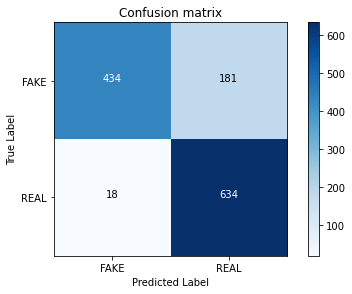

In [42]:
plot_confusion(cm,classes=['FAKE','REAL'])